In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import date,time,timedelta
from colour import Color

import seaborn as sb
import matplotlib.pyplot as plt

date_start = date(2021,1,1)
date_end = date.today()-timedelta(1)

In [2]:
df = pd.read_csv('tradepartners.csv')
df.loc[df.currency == 'EUR','country_display'] = 'Euro Area' # handle known special case
df = df.groupby(['country_display','currency']).sum().reset_index()
df['total_trade'] = df.sum(axis=1,numeric_only=True) # use export or import columns only if you wish
df['total_export'] = df.export_2021 + df.export_2022
df['total_import'] = df.import_2021 + df.import_2022

country_weight = {'trade':{},
                  'export':{},
                  'import':{}
                 }

n = 24 # Wanted to get > 90% coverage, chose 24 countries to get nice 6x4 chart

for t in ['export','import','trade']: # overall intentionally last
    col = 'prop_' + t
    df['prop_' + t] = df['total_' + t]/df['total_' + t].sum()
    df = df.sort_values(by='prop_' + t,ascending=False).reset_index(drop=True)
    df['prop_cumul_' + t] = df['prop_' + t].cumsum()

for t in ['export','import','trade']:
    weights = df['prop_' + t].tolist()[:n]
    weights_sum = sum(weights)
    weights = [x/weights_sum for x in weights]
    country_weight[t] = dict(zip(df.country_display.tolist()[:n],weights))

df.head(n+5)

,country_display,currency,export_2021,import_2021,export_2022,import_2022,total_trade,total_export,total_import,prop_export,prop_cumul_export,prop_import,prop_cumul_import,prop_trade,prop_cumul_trade
0,China,CNY,192048.99,229018.50,82700,105099,608866.49,274748.99,334117.50,0.150502,0.150502,0.226643,0.226643,0.184519,0.184519
1,Singapore,SGD,173386.51,93722.34,84956,50402,402466.85,258342.51,144124.34,0.141515,0.292017,0.097764,0.324407,0.121969,0.306488
2,USA,USD,142236.97,74866.62,62427,36417,315947.59,204663.97,111283.62,0.112111,0.404128,0.075487,0.476742,0.095749,0.402237
3,Euro Area,EUR,90720.65,69683.40,45180,31075,236659.05,135900.65,100758.40,0.074444,0.478571,0.068348,0.617383,0.071720,0.473957
4,Japan,JPY,75270.13,73711.97,37364,32863,219209.10,112634.13,106574.97,0.061699,0.540270,0.072293,0.549035,0.066432,0.540389
5,Taiwan,TWD,40538.94,75202.86,21038,38085,174864.80,61576.94,113287.86,0.033731,0.752688,0.076847,0.401254,0.052993,0.593382
6,Thailand,THB,52396.68,45574.95,26965,22762,147698.63,79361.68,68336.95,0.043473,0.644605,0.046355,0.771244,0.044761,0.638143
7,Indonesia,IDR,39216.90,55884.63,19595,29389,144085.53,58811.90,85273.63,0.032216,0.817144,0.057844,0.675227,0.043666,0.681808
8,Hong Kong,HKD,76626.31,17631.92,34481,8064,136803.23,111107.31,25695.92,0.060862,0.601132,0.017430,0.864178,0.041459,0.723267
9,South Korea,KRW,37651.38,50080.70,21204,23131,132067.08,58855.38,73211.70,0.032240,0.784928,0.049662,0.724889,0.040023,0.763290


In [3]:
metric = 'Adj Close' # Use whatever measure you wish; close, open, high, low, or adj close
myr = pd.DataFrame(index=pd.date_range(date_start,date_end+timedelta(1)-timedelta(days=1),freq='d'))
usd = pd.DataFrame(index=pd.date_range(date_start,date_end+timedelta(1)-timedelta(days=1),freq='d'))

bis = pd.read_csv('bis_neer.csv')
bis.date = pd.to_datetime(bis.date).dt.date
bis = bis.set_index('date')

# create scalar using USD/MYR
data = yf.download('MYRUSD=X', start=date_start+timedelta(1), end=date_end+timedelta(1))
myr['scalar'] = data[metric]

data = yf.download('USDMYR=X', start=date_start+timedelta(1), end=date_end+timedelta(1))
usd['Malaysia'] = data[metric]

for cur,col in zip(df.currency.tolist()[:n],df.country_display.tolist()[:n]):
    # Note order: To multiply against scalar which is USD/MYR, we need c/USD * USD/MYR = c/MYR
    data = yf.download('USD' + cur + '=X', start=date_start+timedelta(1), end=date_end+timedelta(1))
    myr[col] = data[metric] * myr['scalar']
    if 'USA' not in col: usd[col] = data[metric]

myr = myr.join(bis)
myr = myr.ffill(axis = 0).bfill(axis=0) # forward fill first for weekends, then bfill in case 1st Jan was a weekend
myr['USA'] = myr['scalar']
myr.drop('scalar',axis=1,inplace=True)

usd = usd.ffill(axis = 0).bfill(axis=0)
myr.head(20)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- USDUSD=X: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[************

,China,Singapore,USA,Euro Area,Japan,Taiwan,Thailand,Indonesia,Hong Kong,South Korea,...,Saudi Arabia,Turkey,UK,Brazil,Mexico,Bangladesh,Switzerland,Canada,Russia,neer
2021-01-01,1.624801,0.328756,0.248756,0.204229,25.678109,6.984751,7.438059,3465.764628,1.928657,269.813435,...,0.932187,1.849204,0.181932,1.291567,4.943905,20.688149,0.223408,0.307211,18.385871,85.63
2021-01-02,1.624801,0.328756,0.248756,0.204229,25.678109,6.984751,7.438059,3465.764628,1.928657,269.813435,...,0.932187,1.849204,0.181932,1.291567,4.943905,20.688149,0.223408,0.307211,18.385871,85.63
2021-01-03,1.624801,0.328756,0.248756,0.204229,25.678109,6.984751,7.438059,3465.764628,1.928657,269.813435,...,0.932187,1.849204,0.181932,1.291567,4.943905,20.688149,0.223408,0.307211,18.385871,85.63
2021-01-04,1.624876,0.328525,0.248756,0.203055,25.681342,6.978607,7.451244,3488.184267,1.928609,269.833324,...,0.933060,1.849109,0.181784,1.291517,4.937189,20.794854,0.219677,0.316470,18.439652,85.56
2021-01-05,1.613511,0.329743,0.249750,0.203851,25.755494,7.018231,7.470030,3479.370614,1.936319,271.383606,...,0.935851,1.853521,0.184024,1.322502,4.980632,20.804817,0.220090,0.319206,18.600250,85.45
2021-01-06,1.607771,0.328072,0.249066,0.202488,25.573600,6.962640,7.452055,3469.489521,1.930946,270.597755,...,0.933388,1.839051,0.182740,1.316090,4.956962,20.781844,0.218725,0.315684,18.464534,85.41
2021-01-07,1.611951,0.328705,0.249501,0.202171,25.704592,6.943613,7.465070,3480.913269,1.934356,271.195105,...,0.935025,1.821287,0.183116,1.325574,4.904134,20.777766,0.219079,0.316003,18.485904,85.11
2021-01-08,1.604260,0.327980,0.247678,0.201833,25.706503,6.916855,7.447678,3440.985260,1.920248,270.729407,...,0.928250,1.814638,0.182524,1.339641,4.953585,20.643272,0.219232,0.314150,18.475567,85.35
2021-01-09,1.604260,0.327980,0.247678,0.201833,25.706503,6.916855,7.447678,3440.985260,1.920248,270.729407,...,0.928250,1.814638,0.182524,1.339641,4.953585,20.643272,0.219232,0.314150,18.475567,85.35
2021-01-10,1.604260,0.327980,0.247678,0.201833,25.706503,6.916855,7.447678,3440.985260,1.920248,270.729407,...,0.928250,1.814638,0.182524,1.339641,4.953585,20.643272,0.219232,0.314150,18.475567,85.35


In [4]:
# create percentage changes relative to first date
myr_perc = myr.multiply(1/np.array(list(myr.iloc[0])), axis='columns')
myr_perc = (myr_perc - 1)*100

usd_perc = usd.multiply(1/np.array(list(usd.iloc[0])), axis='columns')
usd_perc = (usd_perc - 1)*100

twer = myr_perc + 100
for t in ['twer_trade','twer_export','twer_import']: twer[t] = 1
for c in twer.columns[:-4]: 
          for t in ['trade','import','export']: twer['twer_' + t] *= twer[c] ** country_weight[t][c]
twer = twer - 100
twer.tail()

,China,Singapore,USA,Euro Area,Japan,Taiwan,Thailand,Indonesia,Hong Kong,South Korea,...,Brazil,Mexico,Bangladesh,Switzerland,Canada,Russia,neer,twer_trade,twer_export,twer_import
2022-07-13,-6.687969,-3.449513,-9.347165,10.053206,20.072459,-3.580045,9.737803,-2.335449,-8.218857,9.138603,...,-5.079998,-4.822571,-0.156698,-0.891552,-4.345434,-28.384076,0.63062,-0.611691,-0.387097,-0.884155
2022-07-14,-6.767080,-3.488615,-9.347165,10.057622,20.864600,-3.899666,9.846945,-2.202711,-8.223535,9.056698,...,-5.876162,-5.167679,0.453069,-0.999558,-4.568587,-28.322751,0.63062,-0.569274,-0.327615,-0.862383
2022-07-15,-6.392995,-3.942736,-9.490038,9.961336,21.848155,-3.558911,10.575863,-2.313324,-8.363977,9.830271,...,-5.468419,-5.248424,0.298461,-0.933873,-3.934077,-28.680630,0.63062,-0.473282,-0.281992,-0.705429
2022-07-16,-6.392995,-3.942736,-9.490038,9.961336,21.848155,-3.558911,10.575863,-2.313324,-8.363977,9.830271,...,-5.468419,-5.248424,0.298461,-0.933873,-3.934077,-28.680630,0.63062,-0.473282,-0.281992,-0.705429
2022-07-17,-6.392995,-3.942736,-9.490038,9.961336,21.848155,-3.558911,10.575863,-2.313324,-8.363977,9.830271,...,-5.468419,-5.248424,0.298461,-0.933873,-3.934077,-28.680630,0.63062,-0.473282,-0.281992,-0.705429


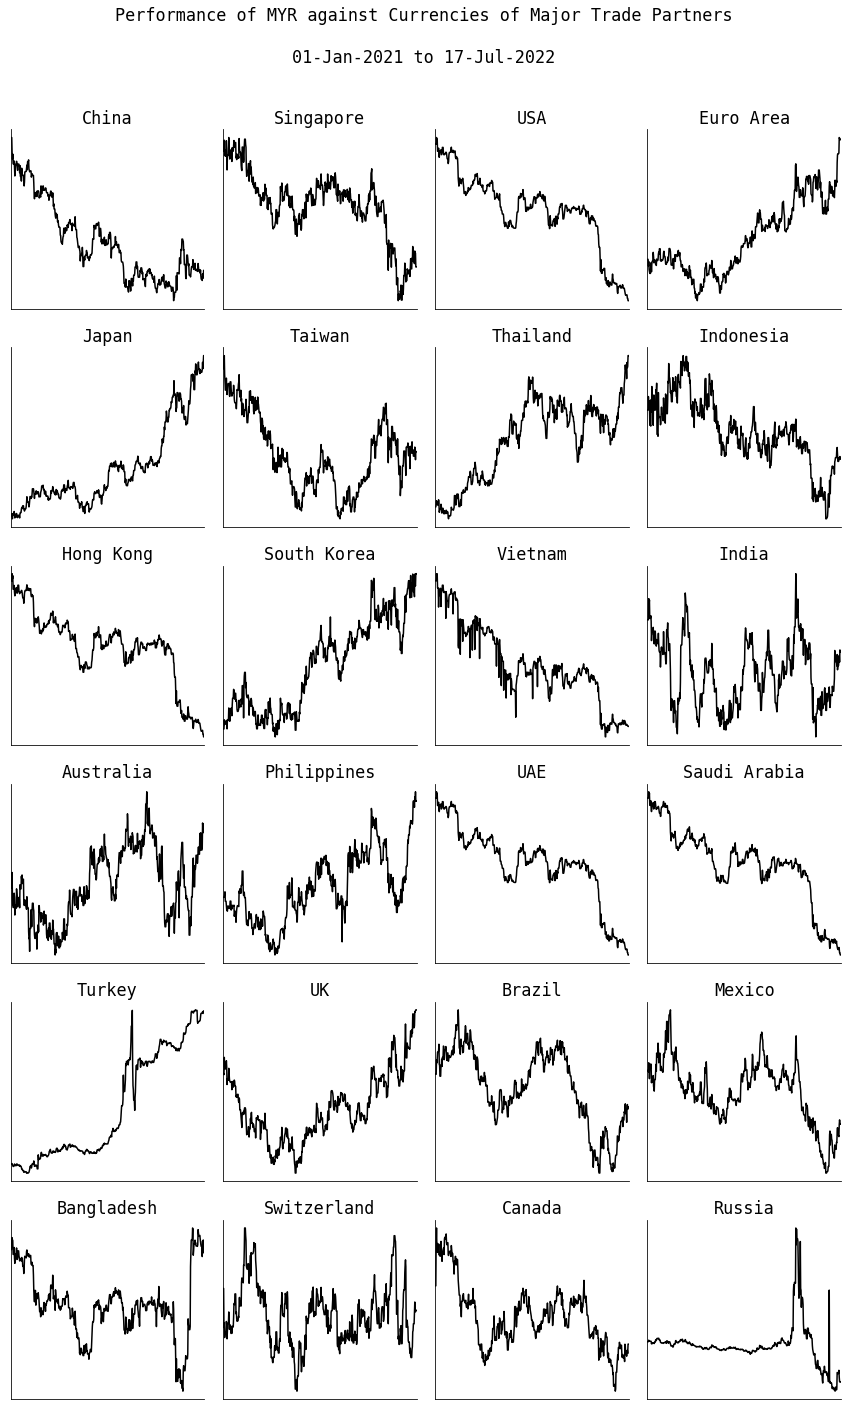

In [5]:
plt.rcParams.update({'font.size': 14,
                     'font.family':'Monospace',
                     'grid.linestyle': 'dotted',
                     'figure.figsize': [12,20],
                     'figure.autolayout': True})
fig, ax = plt.subplots(6,4, sharex=True,sharey=False) # use sharey=True for common y-axis

axes = ax.ravel()
countries = df.country_display.tolist()[:n]
for i in range(n):
    myr_perc[countries[i]].plot(ax=axes[i], kind='line', marker=None, color='black')
    axes[i].set_axisbelow(True)
    axes[i].axes.yaxis.set_visible(False)
    axes[i].axes.xaxis.set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].set_title(countries[i])

plt.suptitle('Performance of MYR against Currencies of Major Trade Partners\n\n'
             + date_start.strftime('%d-%b-%Y') + ' to ' + date_end.strftime('%d-%b-%Y') + '\n\n')
plt.xlabel('')
plt.ylabel('')
plt.savefig('../charts/trade_er_panel.png', pad_inches=0.2, dpi=400)

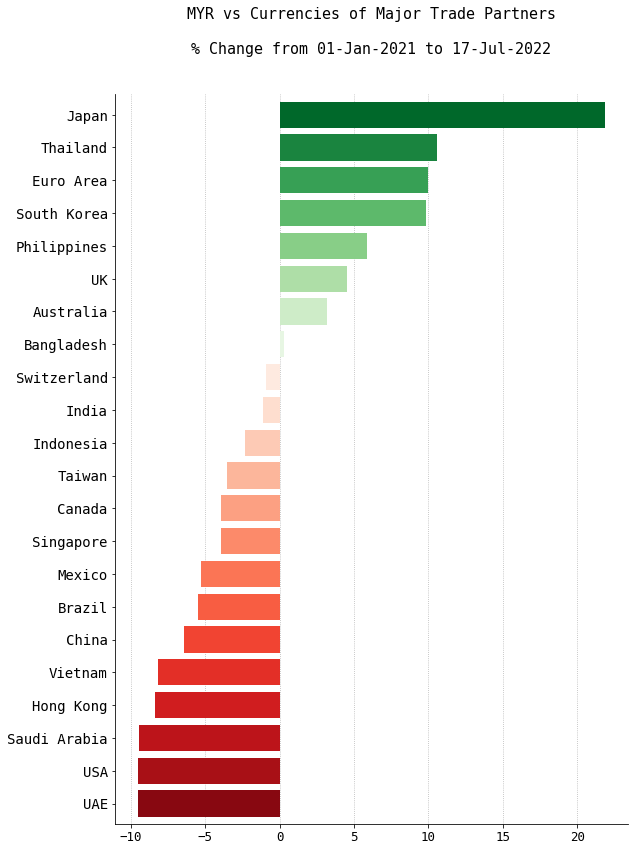

In [6]:
last = myr_perc.loc[[date_end]].transpose()
last.columns = ['performance']
last = last.sort_values(by='performance')
last = last[~last.index.isin(['Turkey','Russia',
                              'neer','twer_trade','twer_export','twer_import'])] # Outliers and irrelevants

plt.rcParams.update({'font.size': 12.5,
                     'font.family':'Monospace',
                     'grid.linestyle': 'dotted',
                     'figure.figsize': [9,12],
                     'figure.autolayout': True})
fig, ax = plt.subplots()

n_pos = len(last[last.performance >= 0])
n_neg = len(last[last.performance < 0])
col_pos = sb.color_palette('Greens',n_colors=n_pos).as_hex()
col_neg = sb.color_palette('Reds',n_colors=n_neg).as_hex()
col_neg.reverse()

ax.barh(last.index,last['performance'],color=col_neg +col_pos)
ax.xaxis.grid(True)
ax.set_axisbelow(True)
ax.set_facecolor('white')
ax.tick_params(axis='y',labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.margins(y=0.01)
plt.title('MYR vs Currencies of Major Trade Partners\n\n'\
          + '% Change from ' + date_start.strftime('%d-%b-%Y') + ' to ' + date_end.strftime('%d-%b-%Y') + '\n\n')
plt.show()

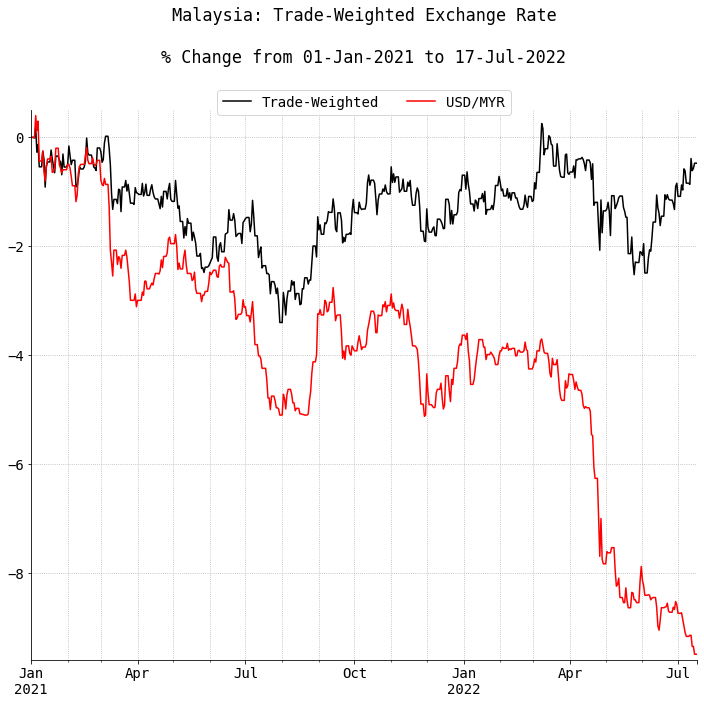

In [7]:
plt.rcParams.update({'font.size': 14,
                     'font.family':'Monospace',
                     'grid.linestyle': 'dotted',
                     'figure.figsize': [10,10],
                     'figure.autolayout': True})
fig, ax = plt.subplots() # use sharey=True for common y-axis

twer['twer_trade'].plot(ax=ax, kind='line', marker=None, color='black')
twer['USA'].plot(ax=ax, kind='line', marker=None, color='red')
ax.set_axisbelow(True)
ax.grid(visible=True,which='both')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(['Trade-Weighted','USD/MYR'], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, labelspacing = 1.5, frameon=True, fancybox=True)

plt.title('Malaysia: Trade-Weighted Exchange Rate\n\n'\
          + '% Change from ' + date_start.strftime('%d-%b-%Y') + ' to ' + date_end.strftime('%d-%b-%Y') + '\n\n')
plt.xlabel('')
plt.ylabel('')
plt.margins(y=0.01)
plt.show()

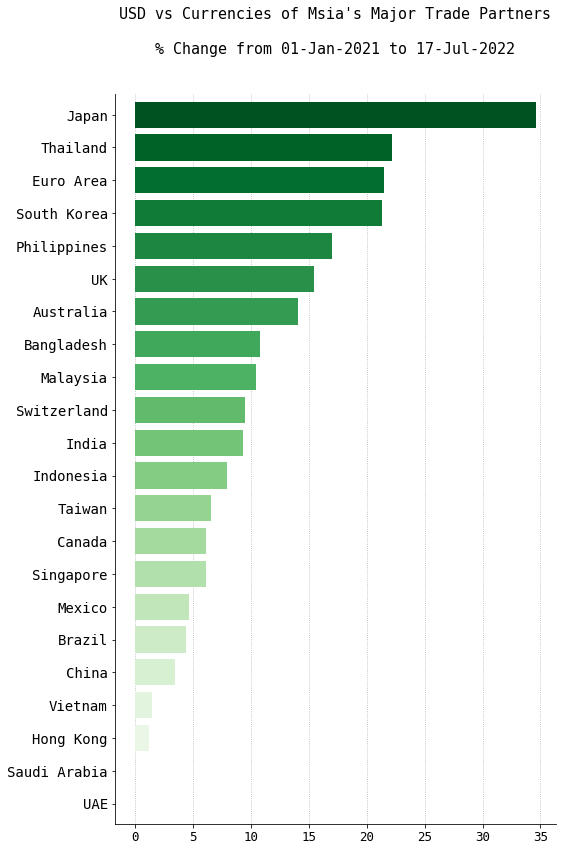

In [8]:
last = usd_perc.loc[[date_end]].transpose()
last.columns = ['performance']
last = last.sort_values(by='performance')
last = last[(last.index != 'Turkey') & (last.index != 'Russia')] # Outlier

plt.rcParams.update({'font.size': 12.5,
                     'font.family':'Monospace',
                     'grid.linestyle': 'dotted',
                     'figure.figsize': [8,12],
                     'figure.autolayout': True})
fig, ax = plt.subplots()

n_pos = len(last[last.performance >= 0])
n_neg = len(last[last.performance < 0])
col_pos = sb.color_palette('Greens',n_colors=n_pos).as_hex()
col_neg = sb.color_palette('Reds',n_colors=n_neg).as_hex()
col_neg.reverse()

ax.barh(last.index,last['performance'],color=col_neg +col_pos)
ax.xaxis.grid(True)
ax.set_axisbelow(True)
ax.set_facecolor('white')
ax.tick_params(axis='y',labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.margins(y=0.01)
plt.title('USD vs Currencies of Msia\'s Major Trade Partners\n\n'\
          + '% Change from ' + date_start.strftime('%d-%b-%Y') + ' to ' + date_end.strftime('%d-%b-%Y') + '\n\n')
plt.show()

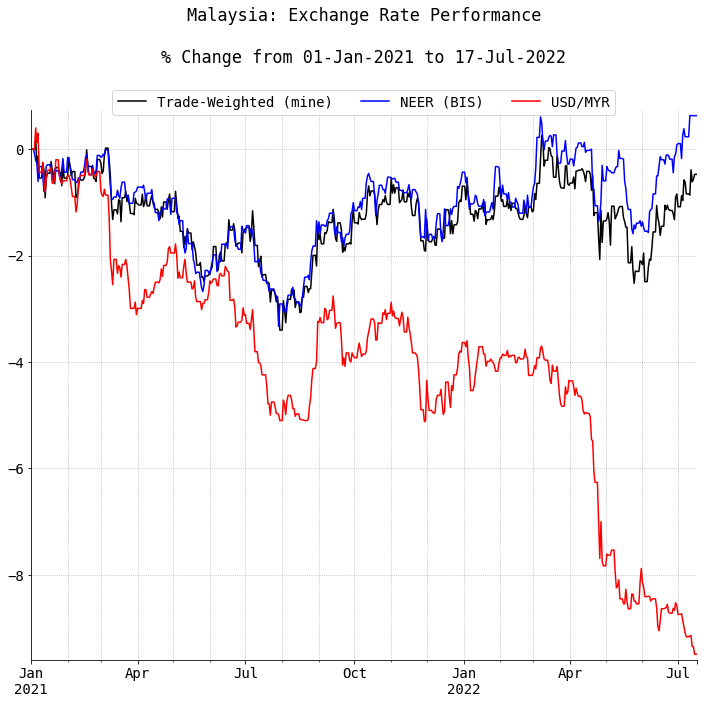

In [9]:
plt.rcParams.update({'font.size': 14,
                     'font.family':'Monospace',
                     'grid.linestyle': 'dotted',
                     'figure.figsize': [10,10],
                     'figure.autolayout': True})
fig, ax = plt.subplots() # use sharey=True for common y-axis

twer['twer_trade'].plot(ax=ax, kind='line', marker=None, color='black')
twer['neer'].plot(ax=ax, kind='line', marker=None, color='blue')
twer['USA'].plot(ax=ax, kind='line', marker=None, color='red')
ax.set_axisbelow(True)
ax.grid(visible=True,which='both')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(['Trade-Weighted (mine)','NEER (BIS)','USD/MYR'], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, labelspacing = 1.5, frameon=True, fancybox=True)

plt.title('Malaysia: Exchange Rate Performance\n\n'\
          + '% Change from ' + date_start.strftime('%d-%b-%Y') + ' to ' + date_end.strftime('%d-%b-%Y') + '\n\n')
plt.xlabel('')
plt.ylabel('')
plt.margins(y=0.01)
plt.show()

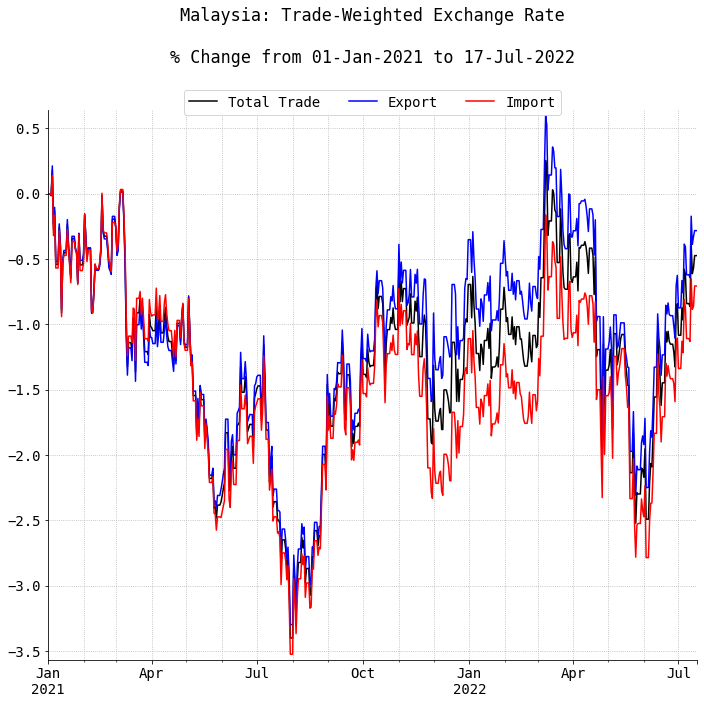

In [10]:
plt.rcParams.update({'font.size': 14,
                     'font.family':'Monospace',
                     'grid.linestyle': 'dotted',
                     'figure.figsize': [10,10],
                     'figure.autolayout': True})
fig, ax = plt.subplots() # use sharey=True for common y-axis

twer['twer_trade'].plot(ax=ax, kind='line', marker=None, color='black')
twer['twer_export'].plot(ax=ax, kind='line', marker=None, color='blue')
twer['twer_import'].plot(ax=ax, kind='line', marker=None, color='red')
ax.set_axisbelow(True)
ax.grid(visible=True,which='both')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(['Total Trade','Export','Import'], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, labelspacing = 1.5, frameon=True, fancybox=True)

plt.title('Malaysia: Trade-Weighted Exchange Rate\n\n'\
          + '% Change from ' + date_start.strftime('%d-%b-%Y') + ' to ' + date_end.strftime('%d-%b-%Y') + '\n\n')
plt.xlabel('')
plt.ylabel('')
plt.margins(y=0.01)
plt.show()